In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [3]:
cmp=pd.read_csv('Company_Data.csv')
cmp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
cmp.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [123]:
cmp["sales"]="<=7.5"
cmp.loc[cmp["Sales"]>=7.5,"sales"]="High Sales"
cmp.loc[cmp["Sales"]<=7.5,"sales"]="Low Sales"
cmp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,High Sales
1,11.22,111,48,16,260,83,1,65,10,1,1,High Sales
2,10.06,113,35,10,269,80,2,59,12,1,1,High Sales
3,7.40,117,100,4,466,97,2,55,14,1,1,Low Sales
4,4.15,141,64,3,340,128,0,38,13,1,0,Low Sales
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High Sales
396,6.14,139,23,3,37,120,2,55,11,0,1,Low Sales
397,7.41,162,26,12,368,159,2,40,18,1,1,Low Sales
398,5.94,100,79,7,284,95,0,50,12,1,1,Low Sales


In [12]:
cmp1=cmp.iloc[:,1:]
cmp1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,High Sales
1,111,48,16,260,83,1,65,10,1,1,High Sales
2,113,35,10,269,80,2,59,12,1,1,High Sales
3,117,100,4,466,97,2,55,14,1,1,Low Sales
4,141,64,3,340,128,0,38,13,1,0,Low Sales
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,High Sales
396,139,23,3,37,120,2,55,11,0,1,Low Sales
397,162,26,12,368,159,2,40,18,1,1,Low Sales
398,100,79,7,284,95,0,50,12,1,1,Low Sales


In [15]:
label_encoder = preprocessing.LabelEncoder()
cmp1['ShelveLoc']= label_encoder.fit_transform(cmp['ShelveLoc']) 
cmp1['Urban']= label_encoder.fit_transform(cmp['Urban']) 
cmp1['US']= label_encoder.fit_transform(cmp['US']) 
cmp1['sales']= label_encoder.fit_transform(cmp['sales']) 
cmp1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [16]:
x=cmp1.iloc[:,0:10]
y=cmp1.iloc[:,10]

In [17]:
cmp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int64
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int64
 9   US           400 non-null    int64
 10  sales        400 non-null    int32
dtypes: int32(1), int64(10)
memory usage: 32.9 KB


In [116]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

# Building Decision Tree Classifier using Entropy Criteria


In [181]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [182]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    42
1    38
dtype: int64

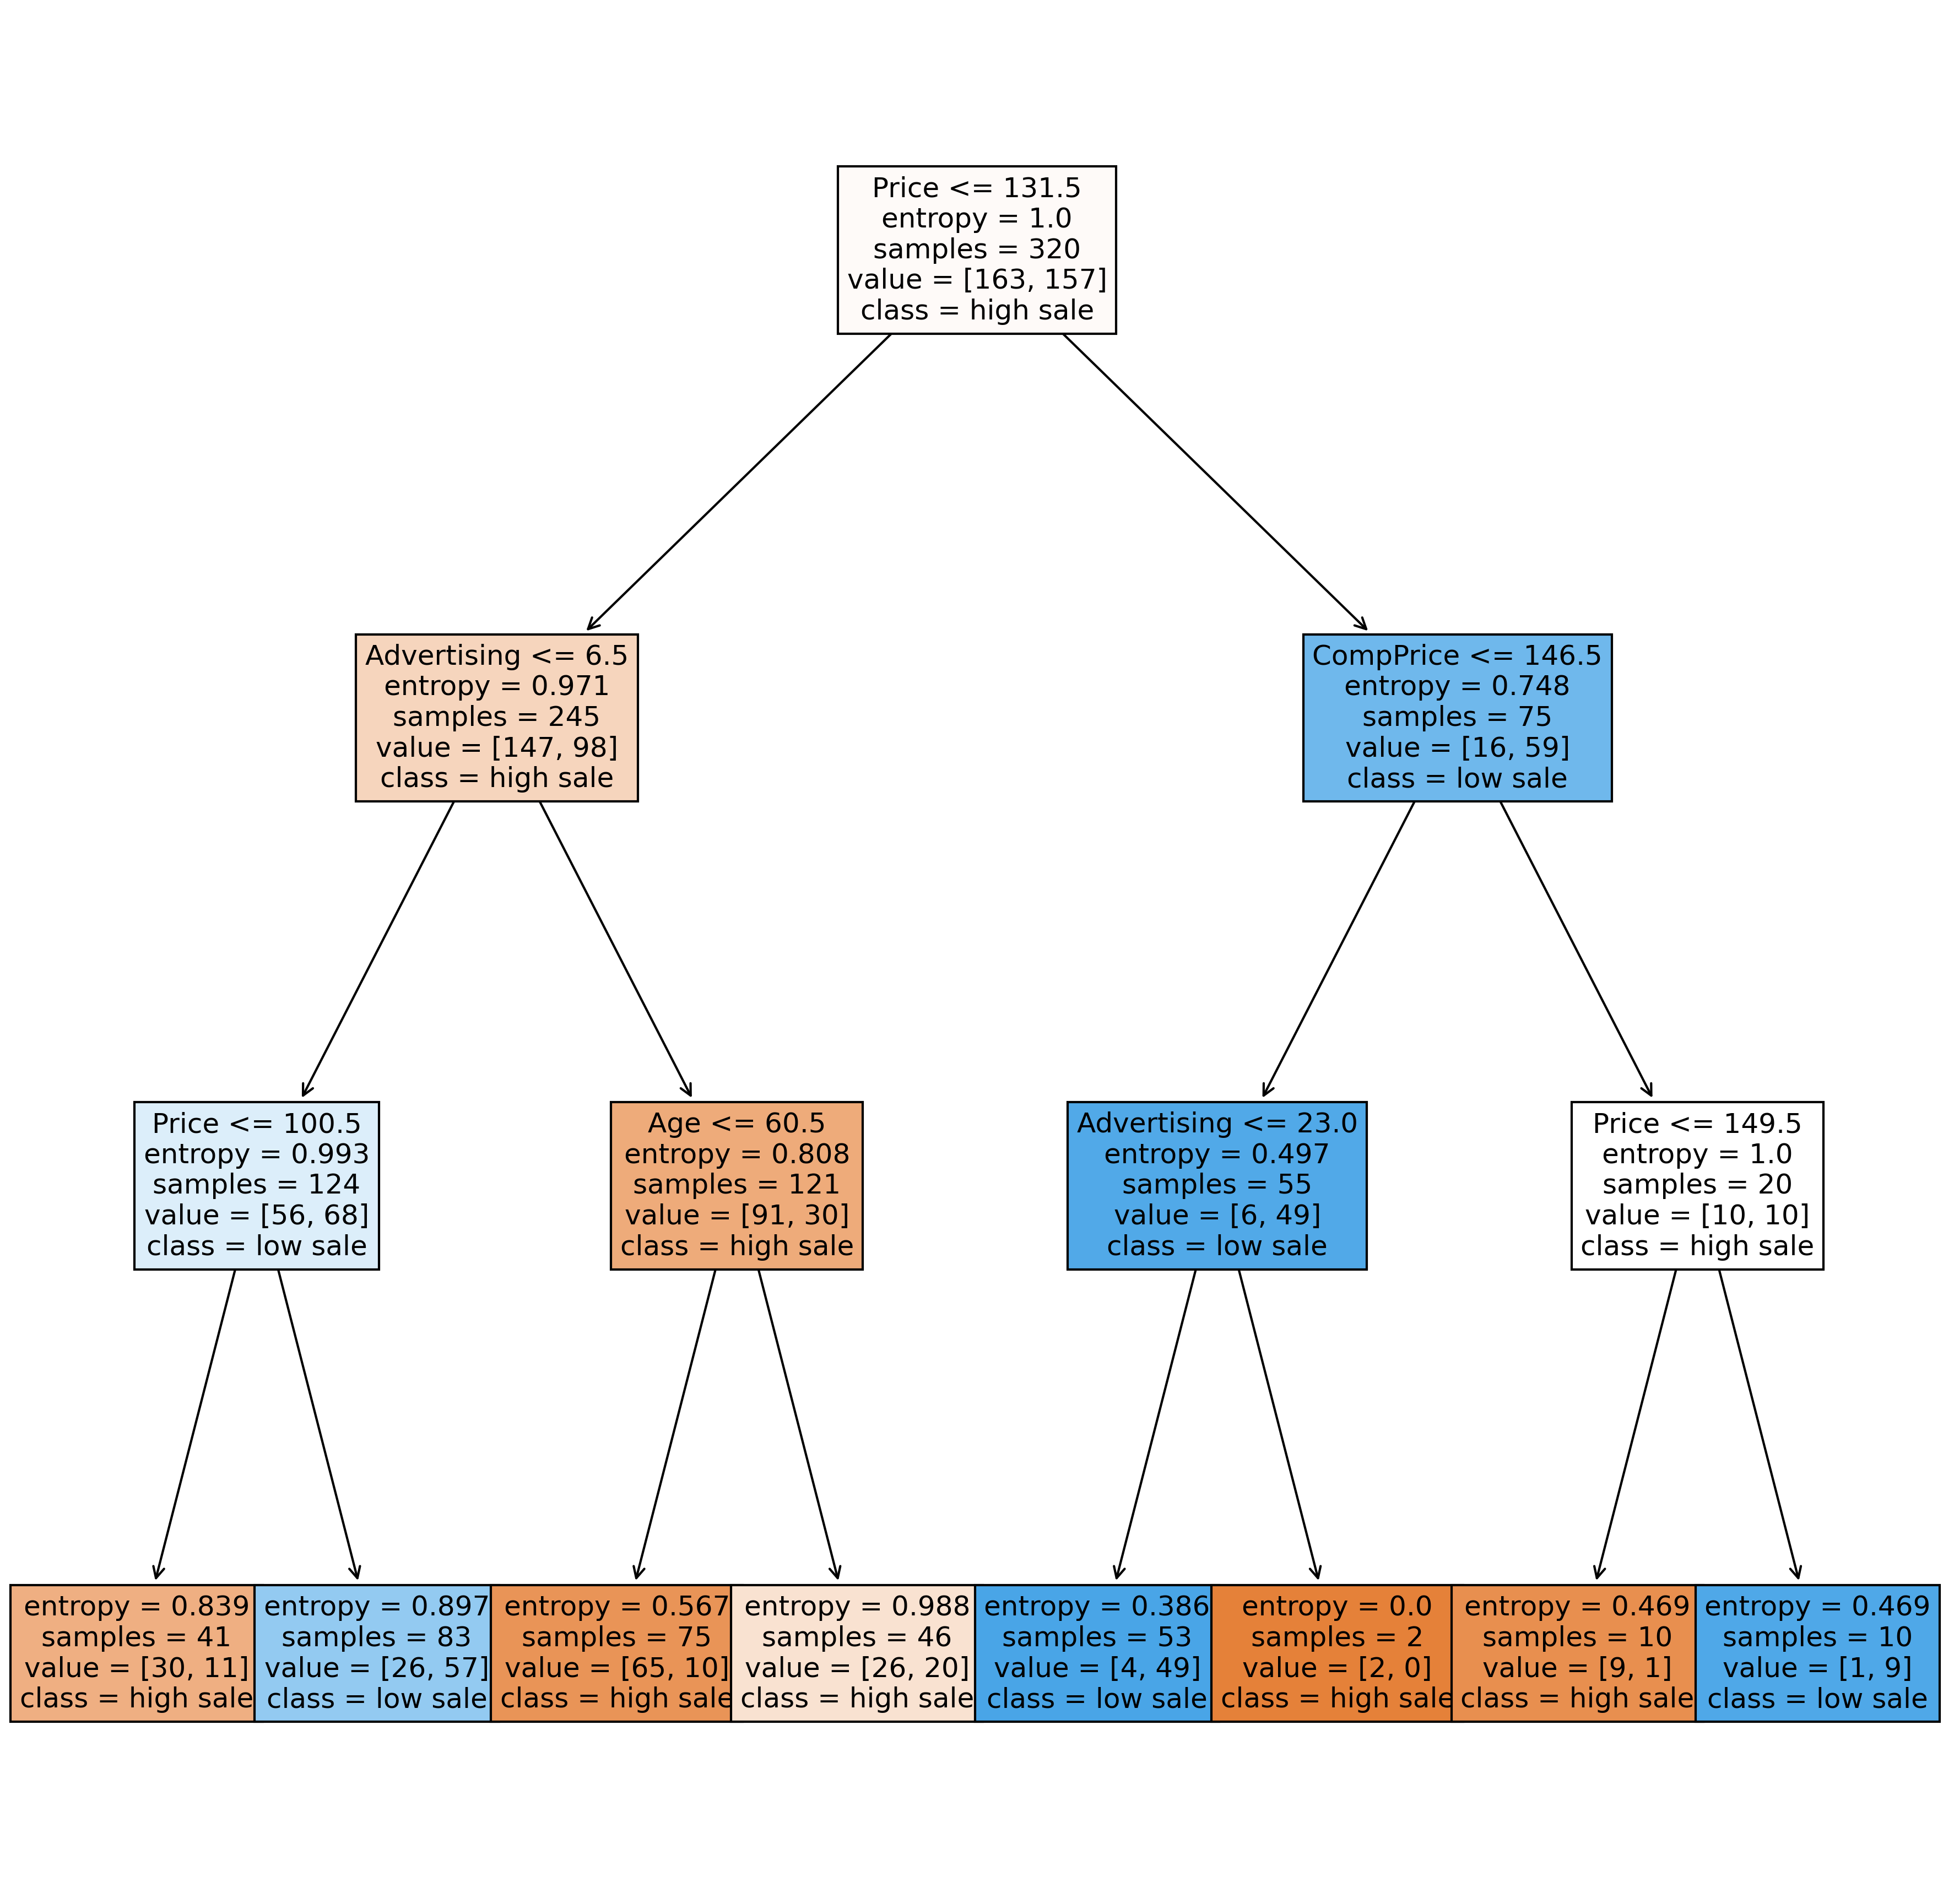

In [183]:
#PLot the decision tree
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','US']
cn=['high sale', 'low sale']
plt.figure(figsize=(15 , 15 ),dpi=300)
tree.plot_tree(model ,feature_names = fn, 
               class_names=cn, fontsize= 12,filled=True);

In [184]:
pd.crosstab(y_test,preds)

col_0,0,1
row_0,,
0,27,8
1,15,30


In [192]:
preds

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [193]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [186]:
# Accuracy 
np.mean(preds==y_test)

0.7125

# Building Decision Tree Classifier (CART) using Gini Criteria


In [199]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [200]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [201]:
pred=model.predict(x_test)
pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [202]:
pd.crosstab(y_test,pred)

col_0,0,1
row_0,,
0,27,8
1,15,30


In [203]:
#Prediction and computing the accuracy
np.mean(pred==y_test) 

0.7125